In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import daft
import seaborn
import matplotlib.pyplot as plt


C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


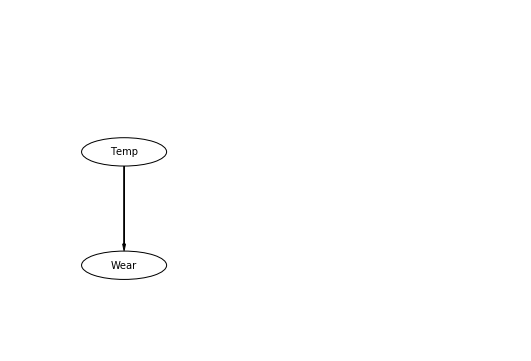

In [2]:
pgm = daft.PGM([9,6],origin=[1, 0.5])
pgm.add_node(daft.Node('Temp','Temp',3,4,aspect=3))
pgm.add_node(daft.Node('Wear','Wear',3,2,aspect=3))
pgm.add_edge('Temp','Wear')
pgm.render();


In [8]:
df = pd.read_csv('C:/Users/DESUSAI/Desktop/Temp.csv',sep=';')



In [9]:
df.describe()

,Time,Temp,RunningTemp,Wear,Slot
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.466667,146.666667,212.533333,17.133333,8.000000
std,0.639940,63.994047,63.482131,5.208052,4.472136
min,1.000000,100.000000,152.000000,12.000000,1.000000
25%,1.000000,100.000000,163.000000,13.000000,4.500000
50%,1.000000,100.000000,193.000000,16.000000,8.000000
75%,2.000000,200.000000,250.500000,20.000000,11.500000
max,3.000000,300.000000,383.000000,31.000000,15.000000


In [10]:
temp_mean= df.Temp.mean()
temp_mean

146.66666666666666

In [11]:
df.skew()

Time           1.084627
Temp           1.084627
RunningTemp    1.473369
Wear           1.428295
Slot           0.000000
dtype: float64

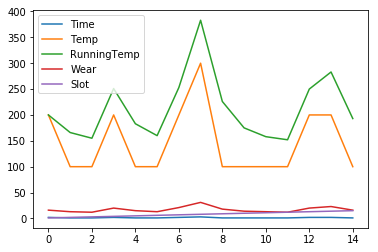

In [12]:
df.plot()
plt.show()

In [13]:
df

,Time,Temp,RunningTemp,Wear,Slot
0,2,200,200,16,1
1,1,100,166,13,2
2,1,100,155,12,3
3,2,200,251,20,4
4,1,100,183,15,5
5,1,100,160,13,6
6,2,200,253,21,7
7,3,300,383,31,8
8,1,100,226,18,9
9,1,100,175,14,10


In [14]:
model = pm.Model();
with model:
    time = pm.Poisson('time',1)
    temp = pm.Normal('temp',df.Temp.mean())
    wear =pm.Normal('wear',temp)
    trace = pm.sample(100000,tune=5000,progressbar=True)
    

Assigned Metropolis to time
Assigned NUTS to temp
Assigned NUTS to wear
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████████████████████████████| 105000/105000 [02:26<00:00, 716.00it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E998978>,
      dtype=object)

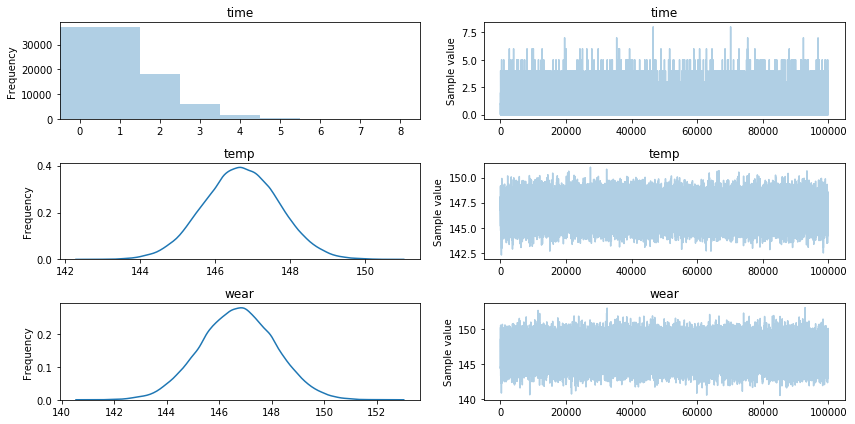

In [15]:
pm.traceplot(trace)

In [16]:
pred = pd.DataFrame({
    "Wear": trace["wear"][50000:],
    "Temp": trace["temp"][50000:],
 
})


In [17]:
pred.Wear.mean()


146.6663450870046

In [18]:
pred.Temp.mean()


146.66918972191183

In [19]:
model2 = pm.Model();
with model2:
    Temp2 = pm.Normal('Temp2',pred.Temp.mean()+pred.Wear.mean())
    wear2 = pm.Normal('wear2',Temp2)
    trace2 = pm.sample(100000,tune=50000,progressbar=True)
    

    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|████████████████████████████████| 150000/150000 [02:20<00:00, 1067.00it/s]


In [74]:
pm.summary(trace)


time:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.011            1.013            0.008            [0.000, 3.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          2.000          3.000


temp:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  166.670          1.007            0.005            [164.729, 168.655]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  164.717        165.988        166.669        167.349        168.645


wear:

  Mean             SD               MC Error         95% HPD interval
  ----------------------

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EA11390>,
      dtype=object)

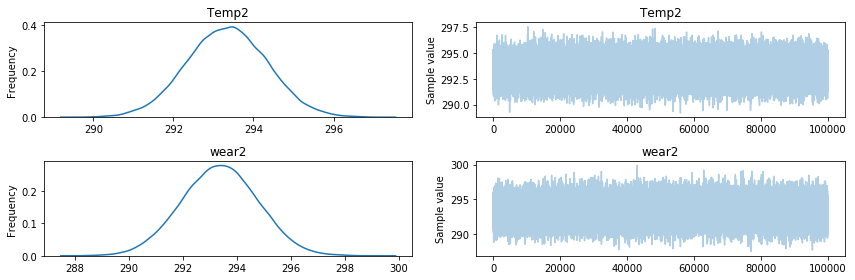

In [20]:
pm.traceplot(trace2)

In [21]:
pm.summary(trace2)


Temp2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  293.340          0.999            0.005            [291.396, 295.315]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  291.384        292.664        293.344        294.016        295.305


wear2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  293.338          1.414            0.006            [290.590, 296.105]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  290.575        292.379        293.345        294.295        296.093

